## VISUALIZING THE GENDER GAP IN COLLEGE DEGREES.

Dataset containing the percentage of bachelor's degrees awarded to women from 1972 to 2012 is released annually by [Department of Educationa Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp). A compiled and cleaned version of the data has been produced by Randal Olsen, a data scientist at the University of Pennsylvania. This notebook focuses on visualizing the data to communicate and explore the narrative gap in all educational fields.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [3]:
women_degrees.head(5)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [4]:
women_degrees.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

### Comparing Across All Degrees

In [5]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences',\
             'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', \
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

In [6]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


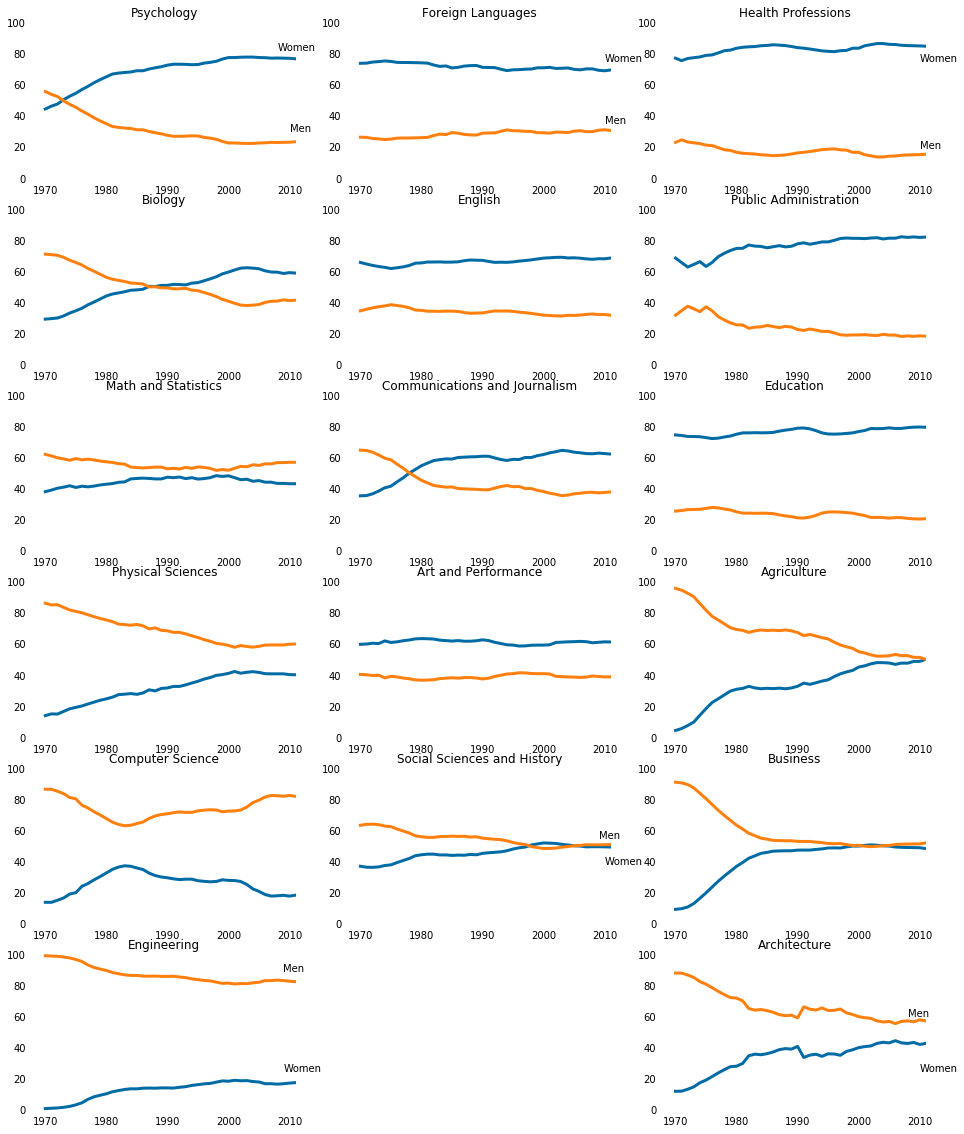

In [7]:
#Generate the 1st column
fig = plt.figure(figsize=(16, 20))

for sp in range(0,18,3):
    cat_index = int(sp / 3)
    ax = fig.add_subplot(6,3, sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if cat_index == 0:
        ax.text(2008,82,'Women')
        ax.text(2010,30,'Men')
    elif cat_index == 5:
        ax.text(2009,25,'Women')
        ax.text(2009,89,'Men')
        
for sp in range(1,16,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(lib_arts_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,35,'Men')
    elif cat_index == 4:
        ax.text(2010,38,'Women')
        ax.text(2009,55,'Men')

for sp in range(2,20,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(other_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,19,'Men')
    elif cat_index == 5:
        ax.text(2010,25,'Women')
        ax.text(2008,60,'Men')
    
plt.show()




### Hiding x-axis Labels

The x-axis is hindering the space between each degree title, However since the titles are crucial to distinguish each degree visualization. The x-axis labels will be hidden for all except the bottomost line using
ax.tick_params(labelbottom = 'off') and labelbottom = 'on'

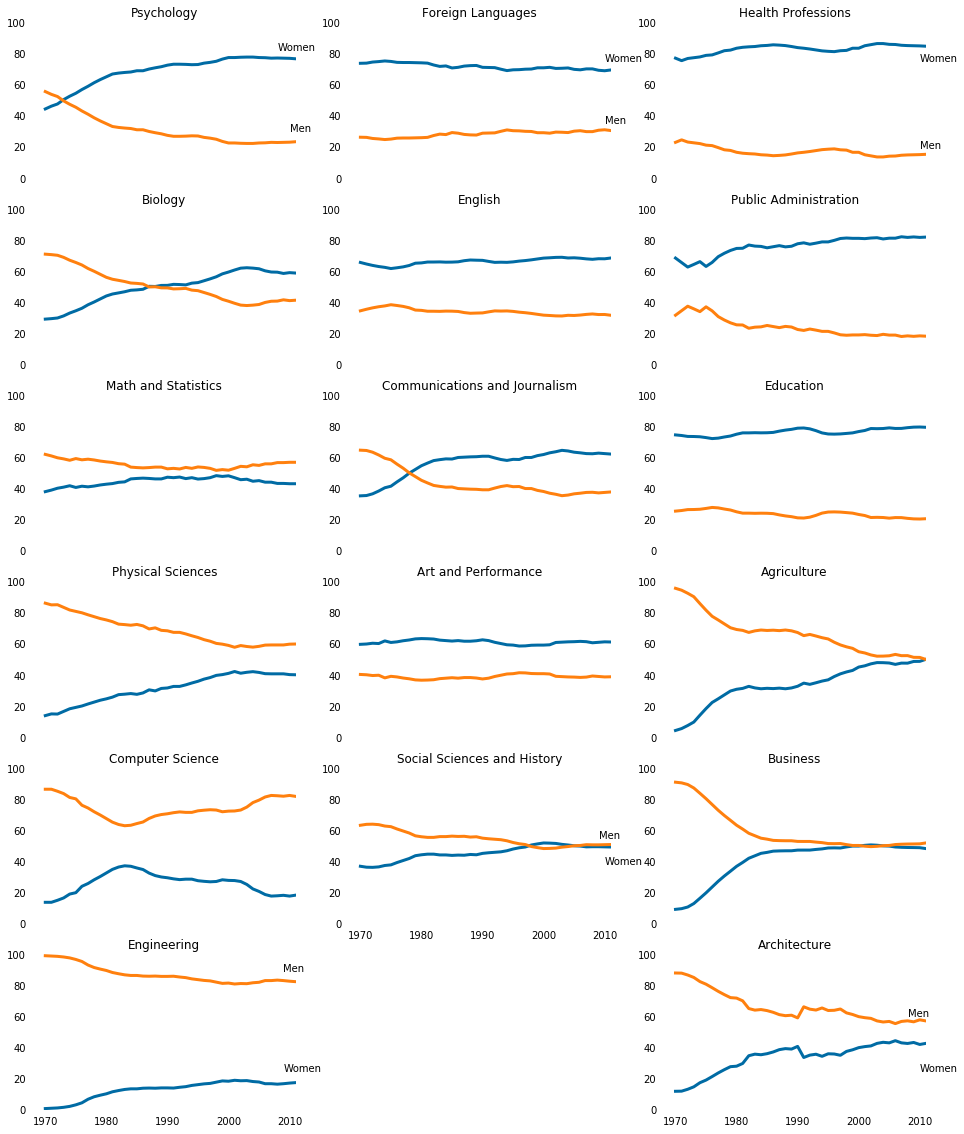

In [8]:
fig = plt.figure(figsize=(16, 20))

for sp in range(0,18,3):
    cat_index = int(sp / 3)
    ax = fig.add_subplot(6,3, sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    if cat_index == 0:
        ax.text(2008,82,'Women')
        ax.text(2010,30,'Men')
    elif cat_index == 5:
        ax.text(2009,25,'Women')
        ax.text(2009,89,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')
        
for sp in range(1,16,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(lib_arts_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,35,'Men')
    elif cat_index == 4:
        ax.text(2010,38,'Women')
        ax.text(2009,55,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')

for sp in range(2,20,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(other_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,19,'Men')
    elif cat_index == 5:
        ax.text(2010,25,'Women')
        ax.text(2008,60,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom ='on')
    
plt.show()



### Setting y-axis labels

The y-axis add to the visual clutter, thus we will limit the y-axis labels to just 0 and 100, i.e the starting and ending labels. This can be done by:

axes.set_yticks([values])

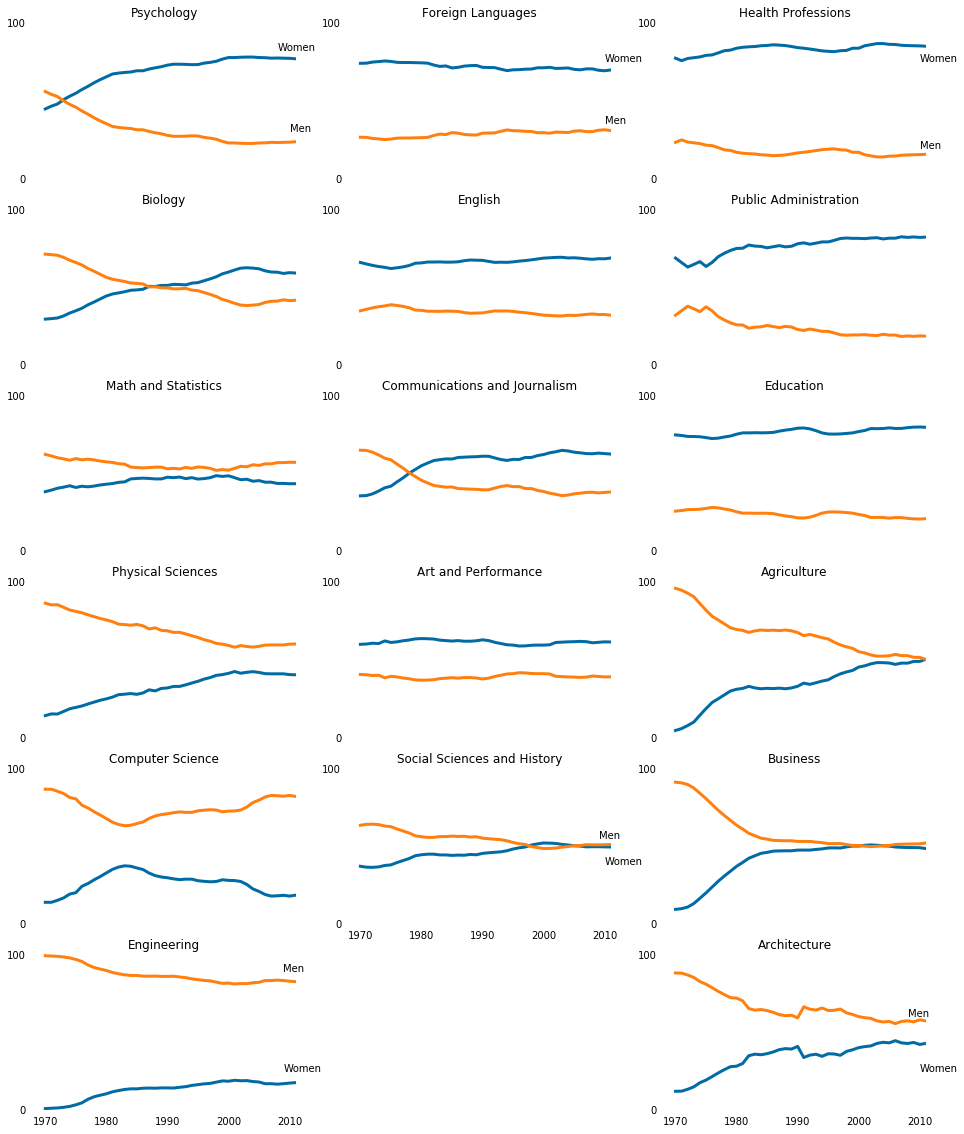

In [9]:
fig = plt.figure(figsize=(16, 20))


for sp in range(0,18,3):
    cat_index = int(sp / 3)
    ax = fig.add_subplot(6,3, sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    if cat_index == 0:
        ax.text(2008,82,'Women')
        ax.text(2010,30,'Men')
    elif cat_index == 5:
        ax.text(2009,25,'Women')
        ax.text(2009,89,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')
        
for sp in range(1,16,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(lib_arts_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,35,'Men')
    elif cat_index == 4:
        ax.text(2010,38,'Women')
        ax.text(2009,55,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')

for sp in range(2,20,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(other_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,19,'Men')
    elif cat_index == 5:
        ax.text(2010,25,'Women')
        ax.text(2008,60,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom ='on')
    
plt.show()



### Adding A horizontal line

Due to the lack of y-axis label, the visual graphs are hard to understand which degrees have close to equal gender breakdown, as well as an easy understanding of the upper and lower disparity. 

A horizontal line can be generated across the entire subplot using:

axes.axhline(y-axis location)

optional parameters to be passed in includes:
1. color using c = 'color'
2. alpha (a value between 0 and 1 which creates transparency)


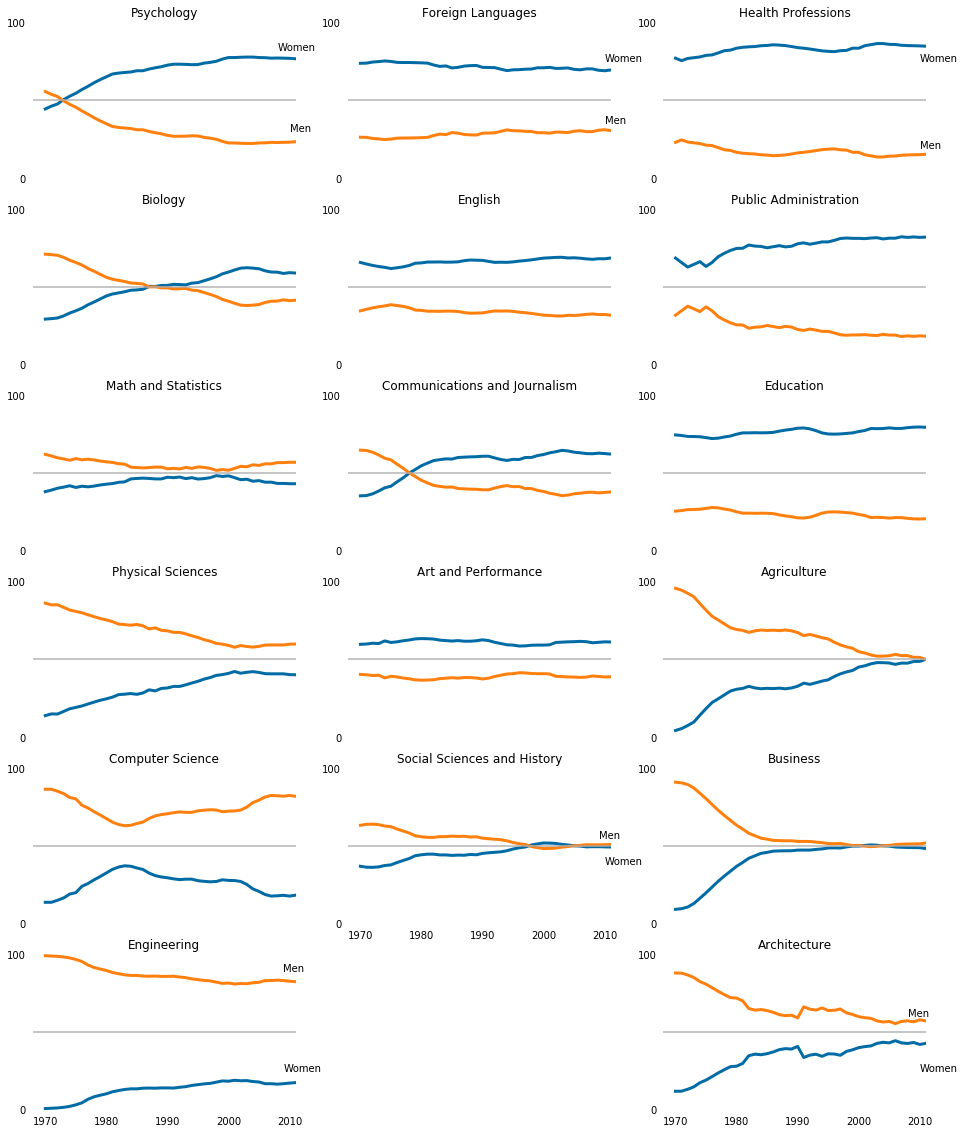

In [10]:
fig = plt.figure(figsize=(16, 20))


for sp in range(0,18,3):
    cat_index = int(sp / 3)
    ax = fig.add_subplot(6,3, sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.9)
    if cat_index == 0:
        ax.text(2008,82,'Women')
        ax.text(2010,30,'Men')
    elif cat_index == 5:
        ax.text(2009,25,'Women')
        ax.text(2009,89,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')
        
for sp in range(1,16,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(lib_arts_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.9)
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,35,'Men')
    elif cat_index == 4:
        ax.text(2010,38,'Women')
        ax.text(2009,55,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')

for sp in range(2,20,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(other_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.9)
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,19,'Men')
    elif cat_index == 5:
        ax.text(2010,25,'Women')
        ax.text(2008,60,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom ='on')
    
plt.show()



### Export Visualization as File

In [11]:
import matplotlib.pyplot
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

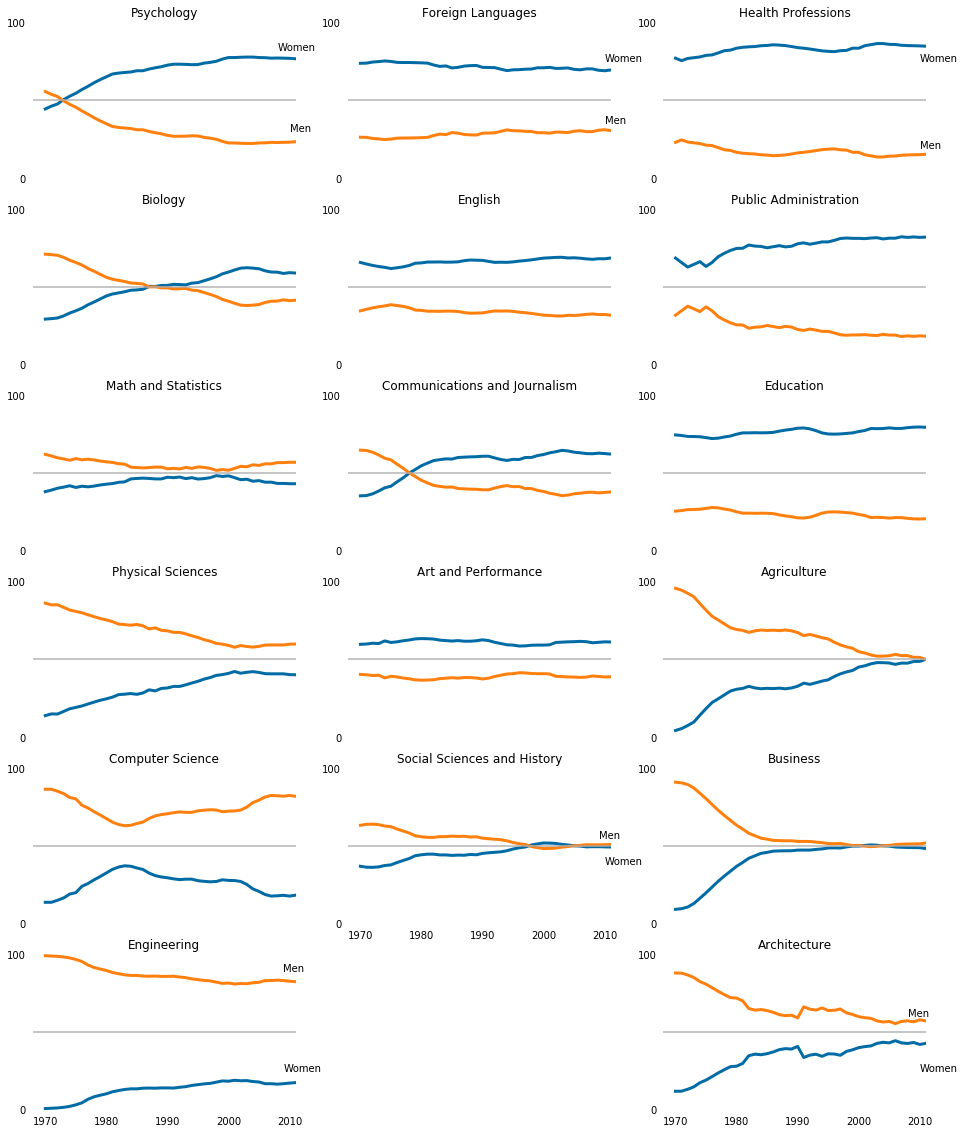

In [12]:
fig = plt.figure(figsize=(16, 20))


for sp in range(0,18,3):
    cat_index = int(sp / 3)
    ax = fig.add_subplot(6,3, sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.9)
    if cat_index == 0:
        ax.text(2008,82,'Women')
        ax.text(2010,30,'Men')
    elif cat_index == 5:
        ax.text(2009,25,'Women')
        ax.text(2009,89,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')
        
for sp in range(1,16,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(lib_arts_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.9)
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,35,'Men')
    elif cat_index == 4:
        ax.text(2010,38,'Women')
        ax.text(2009,55,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'on')

for sp in range(2,20,3):
    cat_index = int((sp - 1)/3)
    ax = fig.add_subplot(6,3,sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Women', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(other_cats[cat_index])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.9)
    if cat_index == 0:
        ax.text(2010,75,'Women')
        ax.text(2010,19,'Men')
    elif cat_index == 5:
        ax.text(2010,25,'Women')
        ax.text(2008,60,'Men')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom ='on')
plt.savefig('all_degrees.png')   
plt.show()



### Final Findings and Conclusion

Category wise of Degrees

1. STEM Degrees have a wider gender gap with engineering, computer science and psychology being at the top in gender differences.

2. Liberal Arts Degrees have a moderate gender gap, with social science and history having no gender gap at all.

3. Likewise Business and Agriculture Degrees have an almost equal gender representation.

4. Women are of more representation in these degrees with high gender gaps which are Psychology, Health Proffessions and Public Administration

4. Men are of more representation in Computer Science and Engineering which have the highest gender gaps.

5. Architecture, Business and Agriculture saw the largest shrinkage in gender differences from 1970 to 2011.

This project was completed by Khadija Lawal Shuaib, as a guided project on Dataquest - 3rd September 2019/